<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%08Decision_Tree(Income_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
df = pd.read_csv('income.csv')
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education_num   32561 non-null  int64 
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours_per_week  32561 non-null  int64 
 9   native_country  32561 non-null  object
 10  income          32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [ ]:
# Null 값 확인
df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# workclass에 들어있는 값 확인하기
set(df['workclass'].value_counts())
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
# categorical feature들을 숫자로 바꾼다.
features = ["workclass", "education_num", "marital_status", "occupation", 
                "relationship", "race", "sex","native_country", "income"]

In [ ]:
# LabelEncoder : 문자를 숫자형 변수로 변환
from sklearn.preprocessing import LabelEncoder
income = df.copy()

enc = {}
for feat in features:
  enc[feat] = LabelEncoder()
  income[feat] = enc[feat].fit_transform(income[feat])
print(feat)

income


In [ ]:
# 숫자로 잘 바뀌었는지 확인하기
income.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,7,12,4,1,1,4,1,40,39,0
1,50,6,12,2,4,0,4,1,13,39,0
2,38,4,8,0,6,1,4,1,40,39,0
3,53,4,6,2,6,0,2,1,40,39,0
4,28,4,12,2,10,5,2,0,40,5,0


In [ ]:
# Train 데이터 세트와 Test 데이터 세트를 구성한다
data = np.array(income)
feature_data = data[:, :-1] # 전체 열에서 마지막요소(income)만 제외
target_data = data[:, -1] # 행에서 -1번째 요소 꺼내기 (income)
x_train, x_test, y_train, y_test = train_test_split(feature_data, target_data, test_size = 0.2)

In [ ]:
print(data)
print('='*30)
print(feature_data)
print('='*30)
print(target_data)

[[39  7 12 ... 40 39  0]
 [50  6 12 ... 13 39  0]
 [38  4  8 ... 40 39  0]
 ...
 [58  4  8 ... 40 39  0]
 [22  4  8 ... 20 39  0]
 [52  5  8 ... 40 39  1]]
[[39  7 12 ...  1 40 39]
 [50  6 12 ...  1 13 39]
 [38  4  8 ...  1 40 39]
 ...
 [58  4  8 ...  0 40 39]
 [22  4  8 ...  1 20 39]
 [52  5  8 ...  0 40 39]]
[0 0 0 ... 0 0 1]


In [ ]:
trainGini = []
testGini = []
trainEntropy = []
testEntropy = []
depth = []

for k in range(1, 1001):
  # Gini 계수를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
  dt.fit(x_train, y_train)

  # 정확도를 측정한다.
  trainGini.append(dt.score(x_train, y_train))
  testGini.append(dt.score(x_test, y_test))

  # Entropy를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
  dt.fit(x_train, y_train)
  trainEntropy.append(dt.score(x_train, y_train))
  testEntropy.append(dt.score(x_test, y_test))

  # depth를 변화시켜가면서 test의 정확도를 측정한다.
  depth.append(k)
  # print('depth = %d done.' % k)

In [ ]:
print(trainGini)
print(testGini)
print(trainEntropy)
print(testEntropy)

[0.7614788083538083, 0.8158783783783784, 0.8257831695331695, 0.8263590294840295, 0.8271268427518428, 0.8297757985257985, 0.8382601351351351, 0.843634828009828, 0.8504299754299754, 0.8577625921375921, 0.867705773955774, 0.8780328624078624, 0.8870162776412777, 0.8968442874692875, 0.907286547911548, 0.9169993857493858, 0.925291769041769, 0.9341216216216216, 0.9404944717444718, 0.9464450245700246, 0.9521268427518428, 0.9566185503685504, 0.9604576167076168, 0.9639127764127764, 0.965793918918919, 0.9672911547911548, 0.9690187346437347, 0.9699785012285013, 0.9704007985257985, 0.9709766584766585, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.9711302211302212, 0.97

In [ ]:
# 정확도 평가
acc = dt.score(x_test, y_test)
print('정확도 = ', np.round(acc, 4))

정확도 =  0.7791


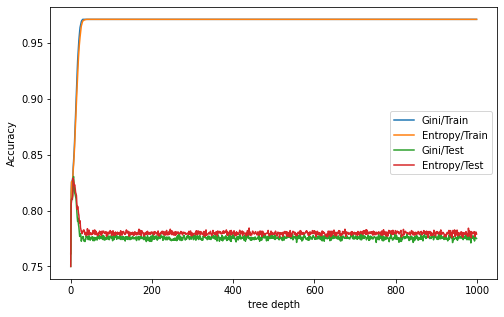

In [ ]:
# Gini와 Entropy, 그리고 tree depth에 따른 정확도를 비교한다.
plt.figure(figsize=(8,5))
plt.plot(trainGini, label = "Gini/Train")
plt.plot(trainEntropy, label = "Entropy/Train")
plt.plot(testGini, label = "Gini/Test")
plt.plot(testEntropy, label = "Entropy/Test")
plt.legend()
plt.xlabel("tree depth")
plt.ylabel("Accuracy")
plt.show()

최적의 depth를 찾아가는 과정  :  ***Pre-pruning***

In [ ]:
# 정확도가 가장 큰 최적 depth를 찾는다.
nDepth = depth[np.argmax(testGini)]
print("정확도가 가장 큰 depth :", nDepth)

정확도가 가장 큰 depth : 8


pre_pruning의 결과를 적용한 Tree사용 : ***Post-pruning***

In [ ]:
# opt_alpha를 적용한 tree를 사용한다.
dt = DecisionTreeClassifier(max_depth = nDepth)
dt.fit(x_train, y_train)
print('시험 데이터의 정확도 = %.4f' % dt.score(x_test, y_test))
print('최적 트리의 depth = %d' % nDepth)

시험 데이터의 정확도 = 0.8302
최적 트리의 depth = 8


In [ ]:
# feature별 중요도를 파악한다.
feat_impo = dt.feature_importances_
feat_name = income.columns
print(feat_impo)
print(feat_name)

[0.08192602 0.01607597 0.28518114 0.00162499 0.03452737 0.48400532
 0.00514632 0.00505644 0.08080144 0.00565498]
Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [ ]:
# 중요도가 높은 feature 5개를 확인한다.
idx = np.argsort(feat_impo)[::-1][:5]
np.array(feat_name)[idx]

array(['relationship', 'education_num', 'age', 'hours_per_week',
       'occupation'], dtype=object)

 - Decision Tree는 sub tree 양쪽의 불순도 (impurity)가 최소가 되도록 feature들의 분기를 결정한다. Tree 분기가 완료된 후에 feature 별로 얼마나 불순도를 감소시켰는지 평균 감소율을 계산하면 feature들의 중요도를 판단할 수 있다.

 
- 특정 feature가 불순도를 감소시키는데 (평균적으로) 크게 기여했다면, 해당 feature는 중요한 것으로 판단한다.

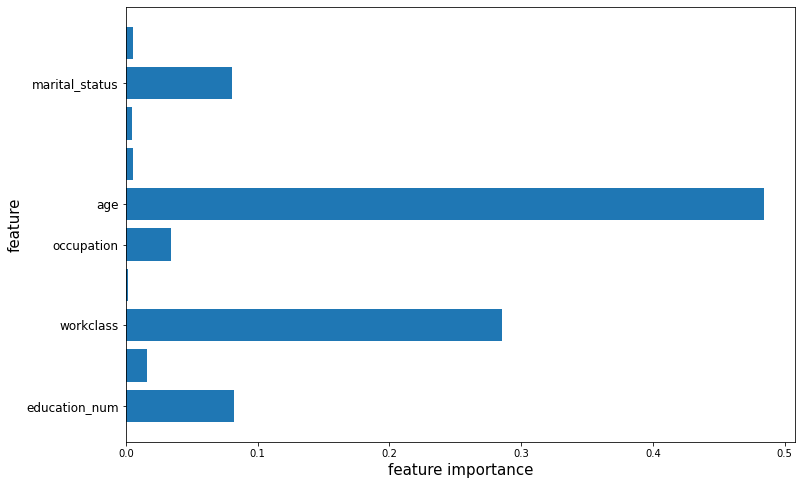

In [ ]:
# feature들의 중요도를 시각화하기. 
feature_importance = dt.feature_importances_ 
feature_name = list(income.columns) 
n_feature = x_train.shape[1]
idx_new = np.arange(n_feature)

plt.figure(figsize=(12, 8))
plt.barh(idx_new, feature_importance, align='center') 
plt.yticks(idx, feature_name, size=12) 
plt.xlabel('feature importance', size=15) 
plt.ylabel('feature', size=15)
plt.show()

# age와 workclass의 기여도가 가장 높다.